In [ ]:
#  Imports et chargement du texte choisi 
import os, re, collections
import matplotlib.pyplot as plt

data_path = "../data/txt"
ref_path  = "../data/article_selectionne.txt"

with open(ref_path, encoding="utf-8") as f:
    chosen_article = f.read().strip()

full_path = os.path.join(data_path, chosen_article)
assert os.path.exists(full_path), f"Introuvable : {full_path}"

with open(full_path, encoding="utf-8") as f:
    raw_text = f.read()

print("Article chargé :", chosen_article)
print("Longueur (caractères) :", len(raw_text))
print(raw_text[:800])  # aperçu

Article chargé : KB_JB838_1920-02-04_01-00001.txt
Longueur (caractères) : 42450
V » s, . lOciitfmM wfERCREW 4 Février 1920 m « AB0NMBMBMT4 1 \ mois . 1.70; S acü : |fc>, * mois : iû.00 ; 1 tu : K) fer. t1 mole, 5 tr.; e mois, 16 tr.i 1 an, •»fr. i S mol*, 10.50; 6 mois, 10.50; l ta, 40.00 /O* «‘ètoffu-d la PotU) iR6d*eiton: RmsollM SIM «t VSK ff|JBMIOW5S{A4iüüilstr6tion ; Bruxoile* il96 /Annonces • Bruxelles 6591. T T? r CtriTO oOlK r Chaque Jouir do 8 à 19 page* BUREAUX t PLACE DE LOUVAIN, 23-25, BRUXELLES Salle de dépêche* : 124, rue Royale Là question du change Voici la contribution à notre enquête d'une m^mfiüenee, d'un homme isolement versé dans 0$ questions économiques et financières, et ta- tuilier avec les statistiques officielles. Question importante, si pas la plus Importante de toutes celles qui préoccupent en ce moment l’opinion. La dépréciation do notre d


In [ ]:
# Nettoyage minimal et tokens 
# garde les lettres (avec accents) et les apostrophes, remplace le reste par espace
text = re.sub(r"[^A-Za-zÀ-ÖØ-öø-ÿ’']", " ", raw_text)
text = re.sub(r"\s+", " ", text).lower().strip()
tokens = text.split()

print("Nb de tokens (brut) :", len(tokens))
tokens[:30]

Nb de tokens (brut) : 6809


['v',
 's',
 'lociitfmm',
 'wfercrew',
 'février',
 'm',
 'ab',
 'nmbmbmt',
 'mois',
 's',
 'acü',
 'fc',
 'mois',
 'iû',
 'tu',
 'k',
 'fer',
 't',
 'mole',
 'tr',
 'e',
 'mois',
 'tr',
 'i',
 'an',
 'fr',
 'i',
 's',
 'mol',
 'mois']

In [14]:
# A. Concordances (KWIC) sur l'article choisi
def concordances(txt, keyword, largeur=55, n=12):
    txt_low = txt.lower()
    i = 0
    count = 0
    while True and count < n:
        i = txt_low.find(keyword.lower(), i)
        if i == -1: break
        d = max(0, i-largeur)
        f = min(len(txt_low), i+len(keyword)+largeur)
        print("...", txt[d:f].replace("\n", " "), "...")
        i = i + len(keyword)
        count += 1

for kw in ["immigration", "immigrant", "étranger", "réfugié", "naturalisation"]:
    print(f"\n=== Concordances pour: {kw} ===")
    concordances(text, kw, largeur=55, n=8)


=== Concordances pour: immigration ===

=== Concordances pour: immigrant ===

=== Concordances pour: étranger ===
... pinion la dépréciation do notre de vii sur les marchés étrangers constitue un danger pour nos financés publiques elle  ...
... arquables préconisant les unes la conclusion d’emprunt étrangers remède sur t’afflcaoité duquel nous émettons les plus ...
...  rien n’emjfccho nos banques d’envoyer des chèques à l’étranger ’ en ce qui oonceroe da balance des relations économiq ...
... andises la participation financière à des em f iriints étrangers et à des entreprises criées à 'étranger les payements ...
...  em f iriints étrangers et à des entreprises criées à 'étranger les payements do toute nafjiré effectués j t étrftngcv ...
... nsit des personnes et des marchandises l’affluence des étrangers de tous ces facteurs deux seuls sont à retenir en ce  ...
... érieur importations et exportations et l'affluence des étrangers les autres certes exercent tous une infiuenoe plus ou 

In [15]:
# B. Collocations (bigrams) sur l'article choisi
import re
from collections import Counter

tokens = re.findall(r"[a-zàâçéèêëîïôûùüÿñæœ'-]{2,}", text.lower())
stop = {"les","des","aux","du","dans","pour","avec","sur","par","une","un","le","la","de","d","et","au","en","se","ces","ce","cette","ses","son","leur"}
tokens_sw = [t for t in tokens if t not in stop]

bigrams = list(zip(tokens_sw, tokens_sw[1:]))
for (w1, w2), c in Counter(bigrams).most_common(20):
    print(f"{w1} {w2}  —  {c}")

qu il  —  14
que nous  —  12
nous avons  —  7
nous devons  —  5
nous nous  —  5
celui ci  —  5
il faut  —  5
il est  —  5
ou moins  —  4
si on  —  4
on peut  —  4
commerce extérieur  —  4
est pas  —  4
pendant guerre  —  4
qui est  —  4
ouvriers belges  —  4
question change  —  3
relations économiques  —  3
belge est  —  3
plus ou  —  3


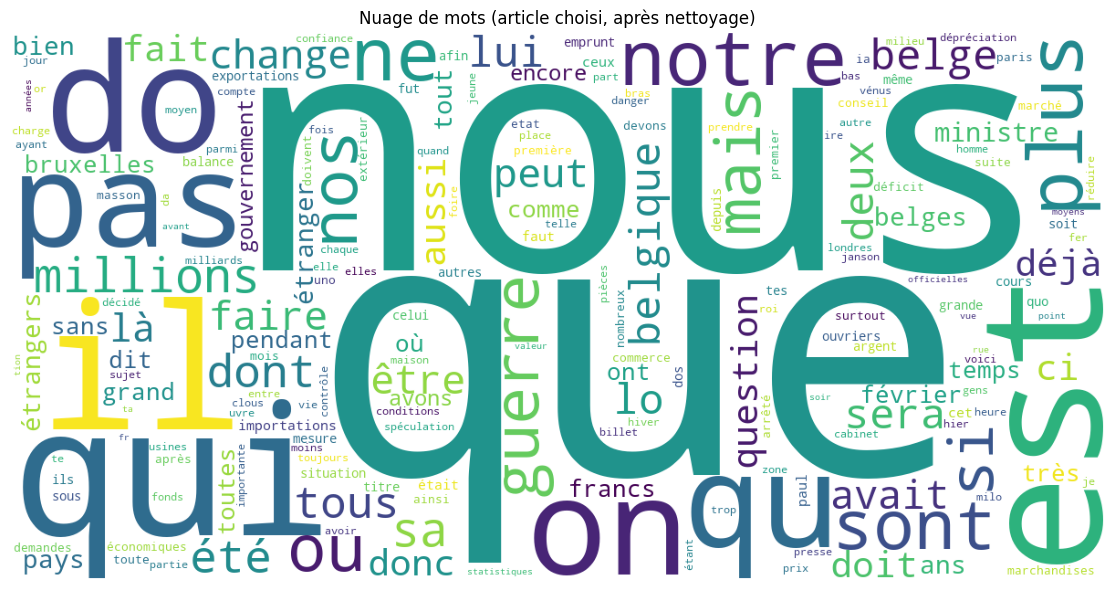

Figure sauvegardée : ../data/fig_wordcloud.png


In [16]:
# C. Nuage de mots (article choisi)
from collections import Counter
freq = Counter(tokens_sw)

try:
    from wordcloud import WordCloud
except ImportError:
    # exécute cette ligne si WordCloud n'est pas installé :
    # !pip install wordcloud
    from wordcloud import WordCloud

wc = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(freq)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Nuage de mots (article choisi, après nettoyage)")
plt.tight_layout()
out_wc = "../data/fig_wordcloud.png"
plt.savefig(out_wc, dpi=150, bbox_inches="tight")
plt.show()
print("Figure sauvegardée :", out_wc)

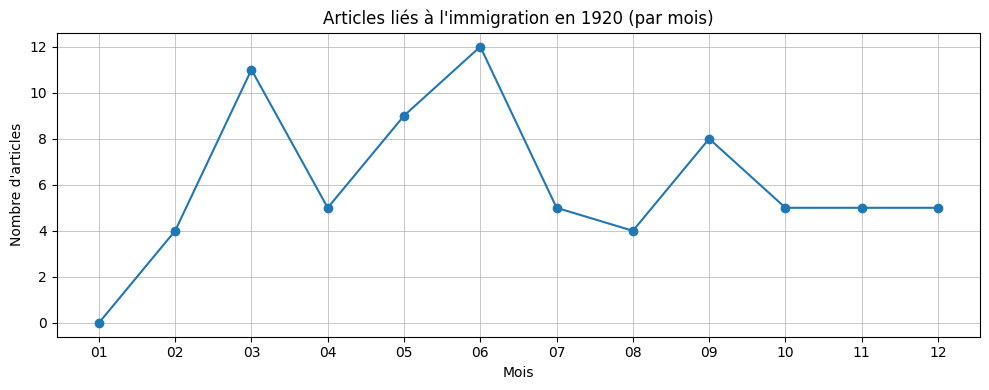

Figure sauvegardée : ../data/fig_timeline_immigration_1920.png


In [17]:
# D. Courbe temporelle des articles "immigration" en 1920
import os, re
from collections import Counter
import matplotlib.pyplot as plt

data_path = "../data/txt"
files_1920 = [f for f in os.listdir(data_path) if f.startswith("KB_JB838_1920") and f.endswith(".txt")]

keywords = ["immigration","immigrant","immigrants","étranger","étrangère","étrangers","étrangères","réfugié","réfugiés","asile","naturalisation"]

def contains_kw(path):
    with open(path, encoding="utf-8") as f:
        t = f.read().lower()
    return any(k in t for k in keywords)

hits = []
for fname in files_1920:
    path = os.path.join(data_path, fname)
    if contains_kw(path):
        m = re.search(r"1920-(\d{2})-\d{2}", fname)
        if m:
            hits.append(m.group(1))

per_month = Counter(hits)
months = [f"{m:02d}" for m in range(1,13)]
counts = [per_month.get(m,0) for m in months]

plt.figure(figsize=(10,4))
plt.plot(range(1,13), counts, marker="o")
plt.xticks(range(1,13), months)
plt.title("Articles liés à l'immigration en 1920 (par mois)")
plt.xlabel("Mois")
plt.ylabel("Nombre d'articles")
plt.grid(True, linewidth=0.5)
plt.tight_layout()
out_tl = "../data/fig_timeline_immigration_1920.png"
plt.savefig(out_tl, dpi=150, bbox_inches="tight")
plt.show()
print("Figure sauvegardée :", out_tl)

In [ ]:
#  Stopwords et fréquences 
stop = {
    "le","la","les","un","une","des","de","du","d","au","aux","en","et","ou","où","à",
    "je","tu","il","elle","on","nous","vous","ils","elles","se","s","m","t","y","l",
    "ce","cet","cette","ces","qui","que","quoi","dont","où","ne","pas","plus","moins",
    "pour","par","avec","sans","sur","sous","entre","dans","comme","ainsi","aussi",
    "être","été","est","sont","sera","seront","fut","étaient","avoir","avait","ont",
    "aujourd","hui","là","été","faire","afin","tres","très","qu","n","c","d’","l’","m’","s’"
}

tokens_clean = [w for w in tokens if len(w) > 2 and w not in stop]
freq = collections.Counter(tokens_clean)
top = freq.most_common(30)
top

[('notre', 26),
 ('nos', 19),
 ('mais', 18),
 ('guerre', 18),
 ('leur', 16),
 ('millions', 16),
 ('qu’il', 14),
 ('tous', 14),
 ('deux', 13),
 ('belgique', 13),
 ('belge', 13),
 ('lui', 13),
 ('change', 12),
 ('peut', 12),
 ('c’est', 12),
 ('question', 10),
 ('déjà', 10),
 ('son', 10),
 ('donc', 10),
 ('doit', 10),
 ('fait', 10),
 ('ministre', 10),
 ('ses', 9),
 ('tout', 9),
 ('pays', 9),
 ('bien', 9),
 ('belges', 9),
 ('ans', 9),
 ('février', 8),
 ('bruxelles', 8)]

Figure sauvegardée : ../data/fig_top_terms.png


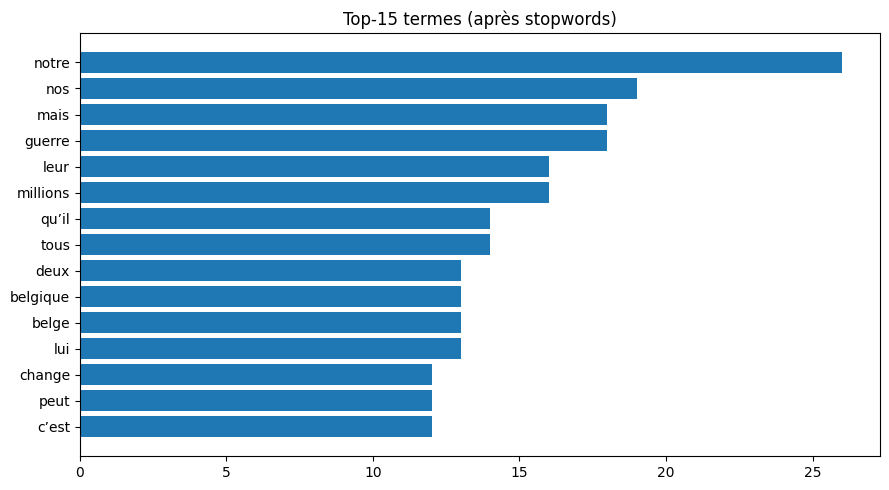

In [ ]:
#  Bar chart top-15 et sauvegarde 
top15 = top[:15]
labels = [w for w,_ in top15]
vals   = [c for _,c in top15]

plt.figure(figsize=(9,5))
plt.barh(range(len(labels)), vals)
plt.yticks(range(len(labels)), labels)
plt.gca().invert_yaxis()
plt.title("Top-15 termes (après stopwords)")
plt.tight_layout()

fig_path = "../data/fig_top_terms.png"
plt.savefig(fig_path, dpi=150)
print("Figure sauvegardée :", fig_path)
plt.show()

In [ ]:
# Si 'text' n'existe pas encore, on charge l'article choisi
try:
    _ = text[:50]
except NameError:
    import os
    data_path = "../data/txt"  
    chosen_article = "KB_JB838_1920-05-14_01-00003.txt"
    with open(os.path.join(data_path, chosen_article), encoding="utf-8") as f:
        text = f.read()

len(text)  # juste pour vérifier qu'on a bien du contenu

40229

In [10]:
import re
from unicodedata import normalize

# Normaliser (accents), passer en minuscules, puis extraire mots (>=2 lettres)
txt_norm = normalize("NFKD", text.lower())
tokens = re.findall(r"\b[^\W\d_]{2,}\b", txt_norm, flags=re.UNICODE)

len(tokens), tokens[:20]  

(6951,
 ['lociitfmm',
  'wfercrew',
  'fe',
  'vrier',
  'ab',
  'nmbmbmt',
  'mois',
  'acu',
  'fc',
  'mois',
  'iu',
  'tu',
  'fer',
  'mole',
  'tr',
  'mois',
  'tr',
  'an',
  'fr',
  'mol'])

In [11]:
# Liste courte de stopwords FR 
stop_fr = {
    'alors','au','aux','avec','ce','cet','cette','ces','dans','de','des','du','elle','en','et','eux','il','ils','je',
    'la','le','les','leur','lui','ma','mais','me','même','mes','moi','mon','ne','nos','notre','nous','on','ou','où',
    'par','pas','pour','qu','que','qui','sa','se','ses','son','sur','ta','te','tes','toi','ton','tu','un','une',
    'vos','votre','vous','c','d','j','l','à','m','n','s','t','y','été','était','être','avoir','a','ai','as','suis',
    'est','sommes','êtes','sont','sera','seront','avait','avaient','plus','moins','très','ainsi','comme','car','donc',
    'ni','or','si','cest','notre','votre','sans','peut','ans','deux'
}

In [12]:
from collections import Counter

tokens_clean = [t for t in tokens if t not in stop_fr and len(t) > 2]
top = Counter(tokens_clean).most_common(15)
top  # contrôle : liste (mot, fréquence)

[('tre', 28),
 ('pre', 19),
 ('guerre', 18),
 ('millions', 16),
 ('dont', 15),
 ('change', 14),
 ('tous', 14),
 ('belgique', 13),
 ('belge', 13),
 ('tranger', 13),
 ('faire', 12),
 ('inte', 11),
 ('aussi', 11),
 ('dit', 11),
 ('ministre', 11)]

Figure sauvegardée -> ../data/fig_top_terms_clean.png


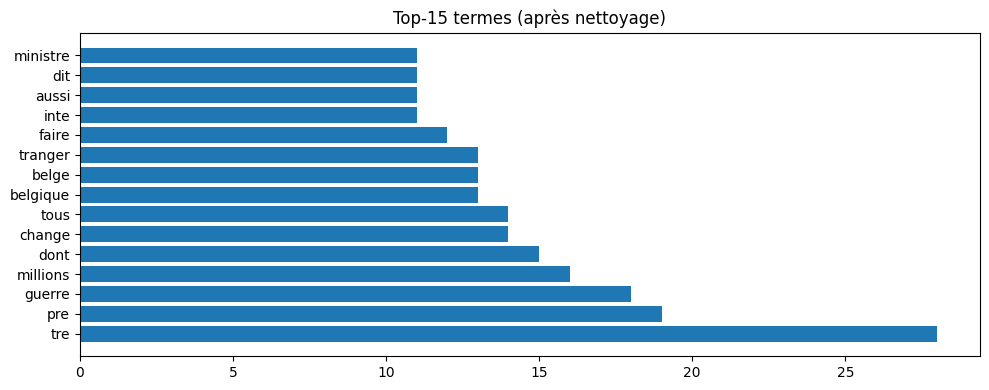

In [13]:
import matplotlib.pyplot as plt

words, counts = zip(*top) if top else ([], [])
plt.figure(figsize=(10,4))
plt.barh(words, counts)
plt.title("Top-15 termes (après nettoyage)")
plt.tight_layout()

out_path = "../data/fig_top_terms_clean.png"
plt.savefig(out_path, dpi=150)
print("Figure sauvegardée ->", out_path)
plt.show()

In [ ]:
#  Concordances simples 
def concordances(txt, keyword, largeur=55, n=10):
    txt_sp = " " + re.sub(r"\s+", " ", txt) + " "
    kw = keyword.lower()
    pos = 0
    hits = 0
    while hits < n:
        i = txt_sp.lower().find(" "+kw+" ", pos)
        if i == -1: break
        gauche = txt_sp[max(0, i-largeur):i].strip()
        droite = txt_sp[i+len(kw)+1:i+len(kw)+1+largeur].strip()
        print(f"... {gauche} \033[1m{kw}\033[0m {droite} ...\n")
        pos = i + len(kw) + 1
        hits += 1

for kw in ["immigration","immigrants","étranger","réfugiés","naturalisation"]:
    print(f"\n===== {kw.upper()} =====")
    concordances(raw_text, kw, largeur=60, n=8)


===== IMMIGRATION =====

===== IMMIGRANTS =====

===== ÉTRANGER =====

===== RÉFUGIÉS =====

===== NATURALISATION =====
... s allemands. Sa mère, veuve, née Oppenheim, obtint >a grande naturalisation belge en IS93. M. Paul May acquit la môme année la national ...



In [6]:
#  Bigrams fréquents 
pairs = list(zip(tokens_clean, tokens_clean[1:]))
bigram_counts = collections.Counter(pairs)
top_bi = bigram_counts.most_common(20)
top_bi

[(('commerce', 'extérieur'), 4),
 (('pendant', 'guerre'), 4),
 (('ouvriers', 'belges'), 4),
 (('question', 'change'), 3),
 (('relations', 'économiques'), 3),
 (('pendant', 'période'), 3),
 (('période', 'millions'), 3),
 (('paul', 'emile'), 3),
 (('emile', 'janson'), 3),
 (('ministre', 'guerre'), 3),
 (('clous', 'ferrer'), 3),
 (('foire', 'commerciale'), 3),
 (('jules', 'verne'), 3),
 (('orphelins', 'guerre'), 3),
 (('place', 'louvain'), 2),
 (('statistiques', 'officielles'), 2),
 (('dépréciation', 'notre'), 2),
 (('nos', 'exportations'), 2),
 (('mais', 'hélas'), 2),
 (('devises', 'étrangères'), 2)]

In [ ]:
#  Exporter les résultats 
import csv, textwrap

# fréquences
csv_path = "../data/freq_top30.csv"
with open(csv_path, "w", newline="", encoding="utf-8") as f:
    w = csv.writer(f)
    w.writerow(["terme","compte"])
    w.writerows(top)
print("CSV écrit :", csv_path)


extrait_path = "../data/extrait_immigration.txt"
with open(extrait_path, "w", encoding="utf-8") as f:
    f.write(textwrap.fill(raw_text[:4000], 100))
print("Extrait écrit :", extrait_path)

CSV écrit : ../data/freq_top30.csv
Extrait écrit : ../data/extrait_immigration.txt


In [ ]:
from pathlib import Path
out_path = Path("fig_top_terms_clean.png")  # je veux le créé dans mon  tp4
plt.savefig(out_path, dpi=150, bbox_inches="tight")
print("Figure sauvegardée :", out_path.resolve())

Figure sauvegardée : /Users/azossieteresafabiola/Tp3/tac/tps/tp4/fig_top_terms_clean.png


<Figure size 640x480 with 0 Axes>